##### 모델링 : 함수 찾기
- 집의 평수를 알면 가격을 알수 있을까?
- y= aX+b
- 데이터를 잘 설명하는 직선 하나를 찾는것이 모델링
##### 손으로 숫자를 그린 이미지를 보고 숫자7인지  1안지 맞출 수 있을까?
- 아주복잡한 결정경계를 그린다. 경계를 그려주는 함수를 찾아내는 과정
#### ANN 인공신경망
- 단일층 : 신경망이 하나 퍼셉트론 1X1 -> 뉴런

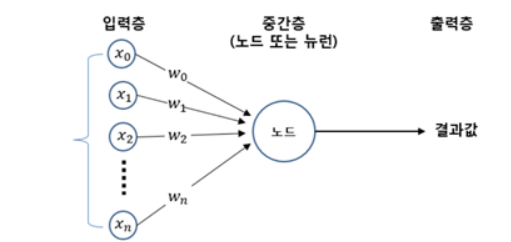

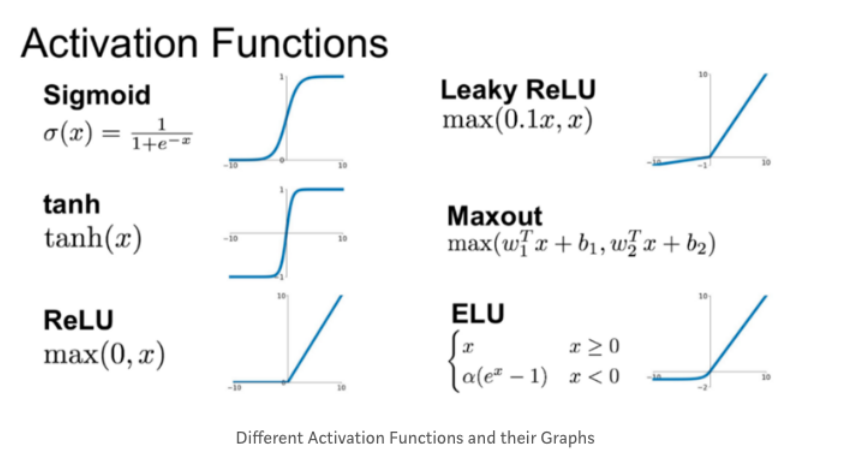

#### 활성화함수...
- 계단함수
- 시그모이드 : 연속적인 값을 출력 = 미분이 가능 - 오차 역전파(차이만큼 업데이트)
- 활성화 함수가 없다... f(z) = z
- y= (W100 X ... W1)X  #거대한 1층짜리 선형모델
- 초기 활성화 함수
    -계단함수 if x >0 1
    -           x <= 0

- 시그모이드 (logisticregression에서 사용) 함수 = logistic Function
    -이진분류 예, 아니요, 0과 1일때 사용

##### 다층신경만 MLP 퍼셉트론을 여러개 쌓아서 올린구조
    -   input layer : 데이터가 들어오는곳 (뉴런수: 데이터의 특성 ex 28x 28들어오면 = 784)
    -   hidden layer : 입력과 출력 사이에 있는 레이어 

In [37]:
%conda install tensorflow

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
# MNIST 데이터셋 로드
#딥러닝 텐서프로로 감잡을 때 사용하고 대부분 파이터치 1.0 버전 2.0 올라갈때 완전 바뀌어서 잘 안씀
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# X,y  = fetch_openml('mnist_784',version=1, return_X_y=True, parser='auto')

In [39]:
from tensorflow import keras
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape #흑백


((60000, 28, 28), (60000,))

In [40]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0 

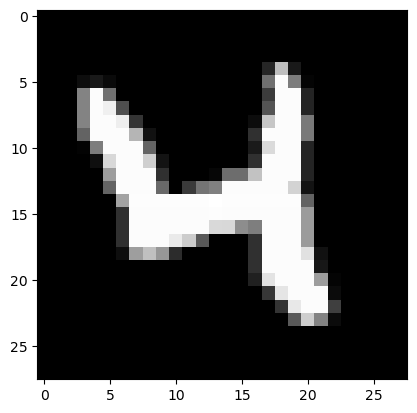

In [41]:
print(y_train[20])
plt.imshow(X_train[20],cmap='gray')
print(X_train[20])

In [42]:
#표준화 minmaxscale안해도 됨 0~255사이에 있어서 픽셀값이라 255로 나누면 0~1사이
# 실수 / 실수 = 실수 ->astype으로 속도 개선
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

- 정답의 종류 클래스
#### 소프트맥스 전체클래스 중에서 하나 선택 전체 10개중에서 정답이 1개일 경우
 - 확률 전체 클래스에 대해서 0~1 다합치면 1되는 구조 0.2 0.6 0.2, 전체 클래스 중에 여러개 중에 1개 선택할때 
#### 시그모이드 다중클래스 전체10개중에서 정답이 여러개일때
=  각 클래스에 대해서 확률을 0~1사이로 변환 0.8 0.9 0.1 


In [ ]:
model = tf.keras.Sequential([
    #입력층 28x28 2차원벡터 -> 784의 1차원 벡터로 만들어줌
    tf.keras.layers.Flatten(input_shape=(28,28)), #데이터 모형만 바꿔줌
    # 은닉층
    tf.keras.layers.Dense(128,activation = 'relu'), #출력의 뉴런의 갯수
    #출력층
    tf.keras.layers.Dense(10,activation='softmax') #시그모이드 softmax 둘다 0~1사이 차이는 softmax는 0.5rlwnsdmfh 0~1  임계치 0.5는 동일
])
model.summary()

c:\Users\Playdata2\miniconda3\envs\deep\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    optimizer = 'adam', #빠르고 안정적인
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [45]:
history = model.fit(
    X_train,
    y_train,
    epochs = 20,
    validation_data = (X_test, y_test),
    verbose = 1 #로그 출력
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2591 - val_accuracy: 0.9589 - val_loss: 0.1401
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9667 - loss: 0.1129 - val_accuracy: 0.9695 - val_loss: 0.0998
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0777 - val_accuracy: 0.9710 - val_loss: 0.0945
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9823 - loss: 0.0584 - val_accuracy: 0.9760 - val_loss: 0.0780
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9860 - loss: 0.0450 - val_accuracy: 0.9767 - val_loss: 0.0743
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0363 - val_accuracy: 0.9773 - val_loss: 0.0744
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0283 - val_accuracy: 0.9769 - val_loss: 0.0803
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0228 - 

In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [48]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=())
# plt.plot(history.history['accuracy'],label = 'train accuracy')
# plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
# plt.legend()
# plt.show()

In [ ]:
pred = model.predict(X_test)
np.pred[10], y_test[10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(array([1.0000000e+00, 1.6641422e-19, 6.2079886e-10, 8.8227684e-19,
        2.4239634e-20, 2.2773053e-14, 8.1936133e-16, 6.0909862e-12,
        1.9728695e-23, 3.9577165e-12], dtype=float32),
 np.uint8(0))

In [ ]:
#머신러닝 형태로
model.evaluate(X_test,y_test)

In [51]:
np.argmax(pred,axis=1).shape

(10000,)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

